In [50]:
# Here are all the installs and imports you will need for your word cloud script and uploader widget
import wordcloud
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display
import fileupload
import io
import sys

In [51]:
# This is the uploader widget

def _upload():

    _upload_widget = fileupload.FileUploadWidget()

    def _cb(change):
        global file_contents
        decoded = io.StringIO(change['owner'].data.decode('utf-8'))
        filename = change['owner'].filename
        print('Uploaded `{}` ({:.2f} kB)'.format(
            filename, len(decoded.read()) / 2 **10))
        file_contents = decoded.getvalue()

    _upload_widget.observe(_cb, names='data')
    display(_upload_widget)

_upload()

FileUploadWidget(label='Browse', _dom_classes=('widget_item', 'btn-group'))

In [52]:
def calculate_frequencies(file_contents):
    # Here is a list of punctuations and uninteresting words you can use to process your text
    punctuations = ['''!()-[]{};:'"\,<>./?@#$´`%^&*_~ ,''']
    uninteresting_words = ["thee","also","him","the", "a", "to", "if", "is", "it", "of", "and", "or", "an", "as", "i", "me", "my", \
    "we", "our", "ours", "you", "your", "yours", "he", "she","his", "her", "hers", "its", "they", "them", \
    "their", "what", "which", "who", "whom", "this", "that", "am", "are", "was", "were", "be", "been", "being", \
    "have", "has", "had", "do", "does", "did", "but", "at", "by", "with", "from", "here", "when", "where", "how",
    "all", "any", "both", "each", "few", "more", "some", "such", "no", "nor", "too", "very", "can", "will", "just", \
    "And", "shall", "not", "thou", "for", "I","unto", "thy", "in", "there", "them", "upon", "out", "into", \
    "before", "after","them", "on", "hath", "ye", "then",'1','2','3','4','5','6','7','8','9','0']

    # LEARNER CODE START HERE
    dictionary = {}

    lowed_case= file_contents.lower()
    separated_words = lowed_case.split()

    #filters words of interest and removes uninteresting words.
    for word in separated_words:

        if word not in uninteresting_words:

            for letter in word:

                if letter in punctuations:
                    letter.replace(punctuations," ")

            if word not in dictionary.keys():
                dictionary[word] = 0
            else :
                dictionary[word]+=1
        else:
            pass


    #wordcloud code
    cloud = wordcloud.WordCloud()
    cloud.generate_from_frequencies(dictionary)
    return cloud.to_array()

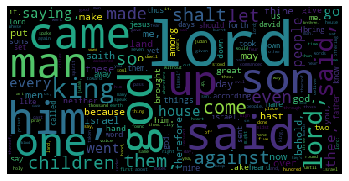

In [53]:
# Display your wordcloud image
myimage = calculate_frequencies(file_contents)
plt.imshow(myimage, interpolation = 'nearest')
plt.axis('off')
plt.show()